In [ ]:
print("NAME:B GANESH, ENROLLMENT NUMBER: 2203031240209")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

NAME:B GANESH, ENROLLMENT NUMBER: 2203031240209


In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<function matplotlib.pyplot.show(close=None, block=None)>

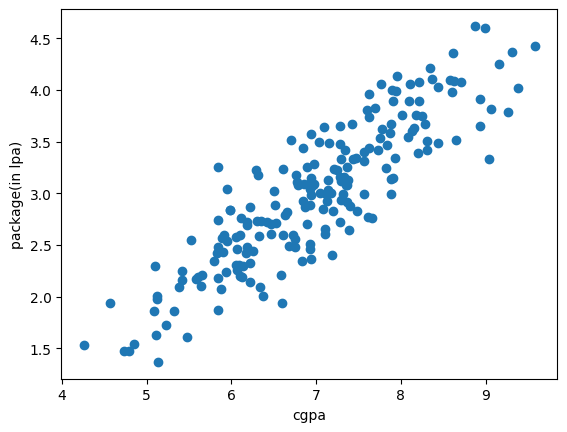

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')
plt.show

In [ ]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [ ]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [ ]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'package(in lpa)')

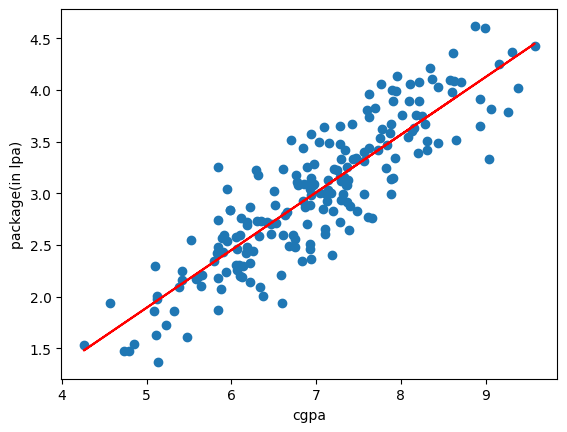

In [ ]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')

In [ ]:
m = lr.coef_
b = lr.intercept_

In [ ]:
m * 8.58 + b

array([3.89111601])

In [ ]:
m * 9.5 + b

array([4.40443183])

In [ ]:
m * 100 + b

array([54.89908542])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,lr.predict(X_test))
y_pred = lr.predict(X_test)
score=r2_score(y_test,y_pred)
print(f'Accuracy score:{score}')

Accuracy score:0.780730147510384


In [ ]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error:{MSE}')

Mean Squared Error:0.12129235313495527


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read the data
St = pd.read_csv('/content/50_Startups.csv')

In [ ]:
St.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
St.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
St.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#check for missing values
St.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
#check for duplicate records
St[St.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [ ]:
#rename the columns
St1 = St.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

In [ ]:
print(St1.RDS)

0     165349.20
1     162597.70
2     153441.51
3     144372.41
4     142107.34
5     131876.90
6     134615.46
7     130298.13
8     120542.52
9     123334.88
10    101913.08
11    100671.96
12     93863.75
13     91992.39
14    119943.24
15    114523.61
16     78013.11
17     94657.16
18     91749.16
19     86419.70
20     76253.86
21     78389.47
22     73994.56
23     67532.53
24     77044.01
25     64664.71
26     75328.87
27     72107.60
28     66051.52
29     65605.48
30     61994.48
31     61136.38
32     63408.86
33     55493.95
34     46426.07
35     46014.02
36     28663.76
37     44069.95
38     20229.59
39     38558.51
40     28754.33
41     27892.92
42     23640.93
43     15505.73
44     22177.74
45      1000.23
46      1315.46
47         0.00
48       542.05
49         0.00
Name: RDS, dtype: float64


In [ ]:
#correlation between
#select only numerical columns
numerical_St1=St1.select_dtypes(include=[np.number])
#calculate the correlation matrix
numerical_St1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


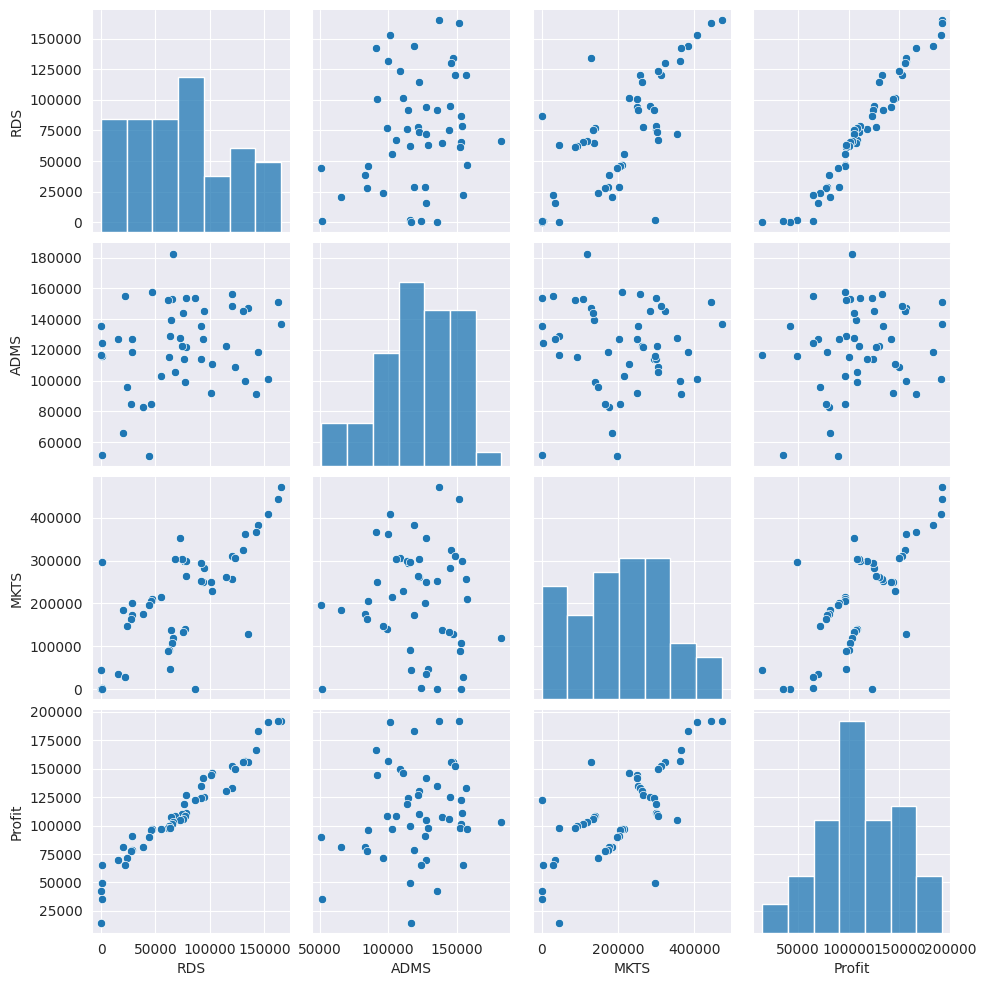

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(St1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = smf.ols("Profit~RDS+ADMS+MKTS",data=St1).fit()

In [ ]:
model.params

NameError: name 'model' is not defined

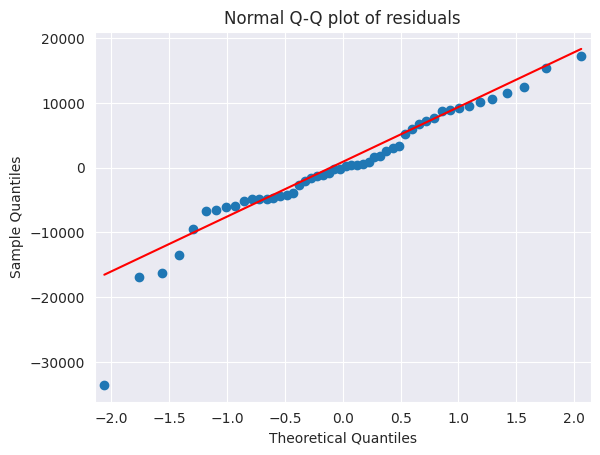

In [ ]:
import statsmodels.api as sm
sns.set_style(style='darkgrid')
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()